# Chirality Check

In chemistry, a molecule is chiral if it cannot be superimposed onto its mirror image by any combination of translation and rotation. These non-superposable mirror images are called enantiomers which share identical chemical and physical properties, but have distinct chemical reactivity and optical rotation properties.

![Fig. 1 Enantiomers prediction of CHFClBr with rotational-orthogonal Procrustes by comparing the atoms coordinates.](notebook_data/chirality_checking/chirality_checking.png "Fig. 1 Enantiomers prediction of CHFClBr with rotational-orthogonal Procrustes by comparing the atoms coordinates.")

The above figure shows enantiomers prediction of CHFClBr with rotational-orthogonal Procrustes by comparing the atoms coordinates. The molecule is shown in ball-stick representation with atoms labeled (**Fig. (i)**). The absolute configurations of the chiral atom are labeled in blue text.

This example is to shows how easily the `Procrustes` library can be used to check whether two geometries of the CHFClBr molecule are enantiomers using the `IOData` library to obtain their three-dimensional coordinates from XYZ files. This is done by testing whether their coordinates can be matched through translation and rotation (i.e., rotational Procrustes); the obtained Procrustes error of 26.09 Å reveals that these two structures are not identical. However, it is confirmed that the two coordinates are enantiomers because they can be matched through translation, rotation, and reflection (i.e., orthogonal Procrustes) gives a Procrustes error of $ 4.43 \times 10^{-8} Å$; thus, reflection is essential to match the structures.

In [ ]:
# only run this cell if you need to install the dependices
!pip install git+https://github.com/theochem/procrustes.git@master
!pip install git+https://github.com/theochem/iodata.git@master

The 3D atomic coordinates have been extracted into `R.dat` and `S.dat`.

In [1]:
# load the libraries
import numpy as np

from iodata import load_one
from procrustes import orthogonal, rotational

In [2]:
# load CHClFBr enantiomers' coordinates from XYZ files
a = load_one("notebook_data/chirality_checking/enantiomer1.xyz").atcoords
b = load_one("notebook_data/chirality_checking/enantiomer2.xyz").atcoords

In [3]:
# rotational Procrustes on a & b coordinates
result_rot = rotational(a, b, translate=True, scale=False)
print("Error =", result_rot.error)

Error = 26.08554575402178


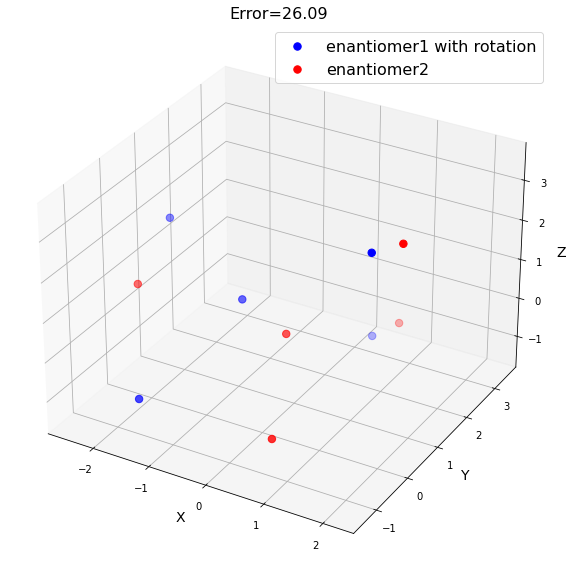

In [4]:
# plot coordinates with only rotation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a_rot = np.dot(a, result_rot.t)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(a_rot[:,0], a_rot[:,1], a_rot[:,2], zdir="z", 
           s=55, c="b", label="enantiomer1 with rotation")
ax.scatter(b[:,0], b[:,1], b[:,2], zdir="z", s=55, 
           c="r", label="enantiomer2")

ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
ax.set_zlabel("Z", fontsize=14)

ax.set_title("Error={:0.2f}".format(result_rot.error), fontsize=16)
ax.legend(fontsize=16)
plt.show()

In [5]:
# orthogonal Procrustes on a & b coordinates
result_ortho = orthogonal(a, b, translate=True, scale=False)
print("Error =", result_ortho.error)

Error = 4.432878638510348e-08


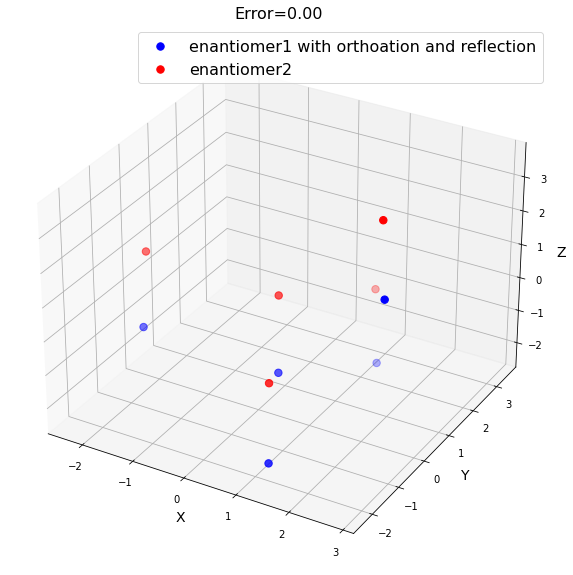

In [6]:
# plot coordinates with both orthoation and reflection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a_ortho = np.dot(a, result_ortho.t)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(a_ortho[:,0], a_ortho[:,1], a_ortho[:,2], zdir="z", 
           s=55, c="b", 
           label="enantiomer1 with orthoation and reflection")
ax.scatter(b[:,0], b[:,1], b[:,2], zdir="z", s=55, 
           c="r", label="enantiomer2")

ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
ax.set_zlabel("Z", fontsize=14)

ax.set_title("Error={:0.2f}".format(result_ortho.error), 
             fontsize=16)
ax.legend(fontsize=16)
plt.show()